#                               **Reducing Traffic Mortality**

**Project Description**

While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.
By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of states with similar profiles. How can we find such groups in a statistically sound way and communicate the result effectively?

- **Project Tasks**
    - The raw data files and their format
    - Read in and get an overview of the data
    - Create a textual and a graphical summary of the data
    - Quantify the association of features and accidents
    - Fit a multivariate linear regression
    - Perform PCA on standardized data
    - Visualize the first two principal components
    - Find clusters of similar states in the data
    - KMeans to visualize clusters in the PCA scatter plot
    - Visualize the feature differences between the clusters
    - Compute the number of accidents within each cluster
    - Make a decision when there is no clear right choice

# Import Necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Read in and get an overview of the data

## Load the dataset

In [2]:
df=pd.read_csv(r'C:\Users\psc\Downloads\miles-driven.csv')

## Data audit

In [3]:
df.head()

,state|million_miles_annually
0,Alabama|64914
1,Alaska|4593
2,Arizona|59575
3,Arkansas|32953
4,California|320784


## Splite column

In [4]:
df[['state','million_miles_annually']]=df['state|million_miles_annually'].str.split('|',expand=True)
df.head(2)

,state|million_miles_annually,state,million_miles_annually
0,Alabama|64914,Alabama,64914
1,Alaska|4593,Alaska,4593


## Drop unnecessory column

In [5]:
df.drop(['state|million_miles_annually'],axis=1,inplace=True)

In [6]:
df.head(3)

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575


## Load the accidents data

In [7]:
df1=pd.read_csv(r'C:\Users\psc\Documents\road_accidents1_.csv')

## Check the first five rows

In [8]:
df1.head()

,state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time
0,Alabama|18.8|39|30|80
1,Alaska|18.1|41|25|94
2,Arizona|18.6|35|28|96
3,Arkansas|22.4|18|26|95
4,California|12|35|28|89


## The data has been combined in one column, so splite one column to multiple columns

In [9]:
df1[['state','drvr_fatl_col_bmiles','perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']] = df1['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'].str.split('|',expand=True)
df1.head()

,state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama|18.8|39|30|80,Alabama,18.8,39,30,80
1,Alaska|18.1|41|25|94,Alaska,18.1,41,25,94
2,Arizona|18.6|35|28|96,Arizona,18.6,35,28,96
3,Arkansas|22.4|18|26|95,Arkansas,22.4,18,26,95
4,California|12|35|28|89,California,12,35,28,89


## Drop unnecessory column

In [10]:
df1.drop(['state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time'],axis=1,inplace=True)
df1.head(2)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94


## Merge two dataset in one CSV file

- To Calculate and analyze Road Accident Data, We must merge all 2 CSV files into one.

In [11]:
df=pd.merge(df,df1,on='state')
df.head()

,state,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,64914,18.8,39,30,80
1,Alaska,4593,18.1,41,25,94
2,Arizona,59575,18.6,35,28,96
3,Arkansas,32953,22.4,18,26,95
4,California,320784,12,35,28,89


## A concise summary of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     object
 2   drvr_fatl_col_bmiles    51 non-null     object
 3   perc_fatl_speed         51 non-null     object
 4   perc_fatl_alcohol       51 non-null     object
 5   perc_fatl_1st_time      51 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


## Clean up the data : 
- The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

### Display number of null values: 

In [13]:
df.isnull().sum()

state                     0
million_miles_annually    0
drvr_fatl_col_bmiles      0
perc_fatl_speed           0
perc_fatl_alcohol         0
perc_fatl_1st_time        0
dtype: int64

- The null values are note available in our dataset.

## Change the data types of columns 

- Now all columns are object data type , so we need to convert required columns data type.

In [14]:
df=df.astype({'million_miles_annually': np.int64 , 'drvr_fatl_col_bmiles': np.float64, 'perc_fatl_speed' : np.int64, 'perc_fatl_alcohol': np.int64, 'perc_fatl_1st_time': np.int64})

## Now check the data types of all columns

In [15]:
df.dtypes

state                      object
million_miles_annually      int64
drvr_fatl_col_bmiles      float64
perc_fatl_speed             int64
perc_fatl_alcohol           int64
perc_fatl_1st_time          int64
dtype: object

- **Then all columns data type is correct.**

# 2.Create a textual and a graphical summary of the data

We now have an idea of what the dataset looks like. To further familiarize ourselves with this data, we will calculate summary statistics and produce a graphical overview of the data. The graphical overview is good to get a sense for the distribution of variables within the data and could consist of one histogram per column. It is often a good idea to also explore the pairwise relationship between all columns in the data set by using a using pairwise scatter plots (sometimes referred to as a "scatterplot matrix")

In [16]:
summary=df.describe()
summary

,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.000000,51.00000
mean,57851.019608,15.790196,31.725490,30.686275,88.72549
std,59898.414088,4.122002,9.633438,5.132213,6.96011
min,3568.000000,5.900000,13.000000,16.000000,76.00000
25%,17450.000000,12.750000,23.000000,28.000000,83.50000
50%,46606.000000,15.600000,34.000000,30.000000,88.00000
75%,71922.500000,18.500000,38.000000,33.000000,95.00000
max,320784.000000,23.900000,54.000000,44.000000,100.00000


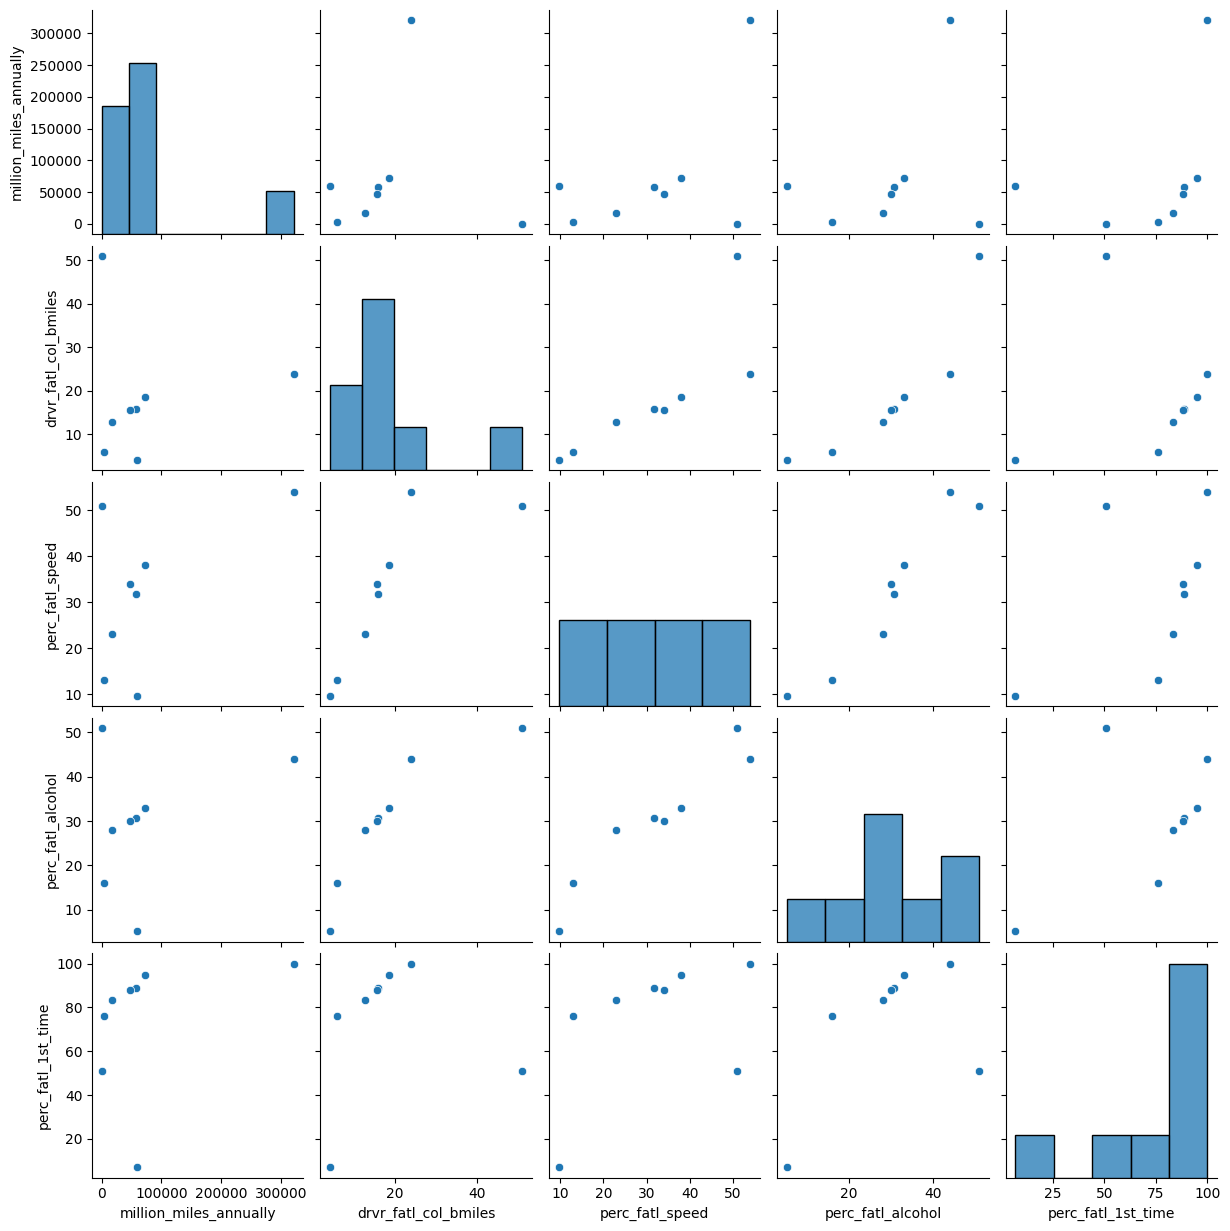

In [17]:
sns.pairplot(summary)



## show the data in histogram

array([[<AxesSubplot: title={'center': 'million_miles_annually'}>,
        <AxesSubplot: title={'center': 'drvr_fatl_col_bmiles'}>],
       [<AxesSubplot: title={'center': 'perc_fatl_speed'}>,
        <AxesSubplot: title={'center': 'perc_fatl_alcohol'}>],
       [<AxesSubplot: title={'center': 'perc_fatl_1st_time'}>,
        <AxesSubplot: >]], dtype=object)

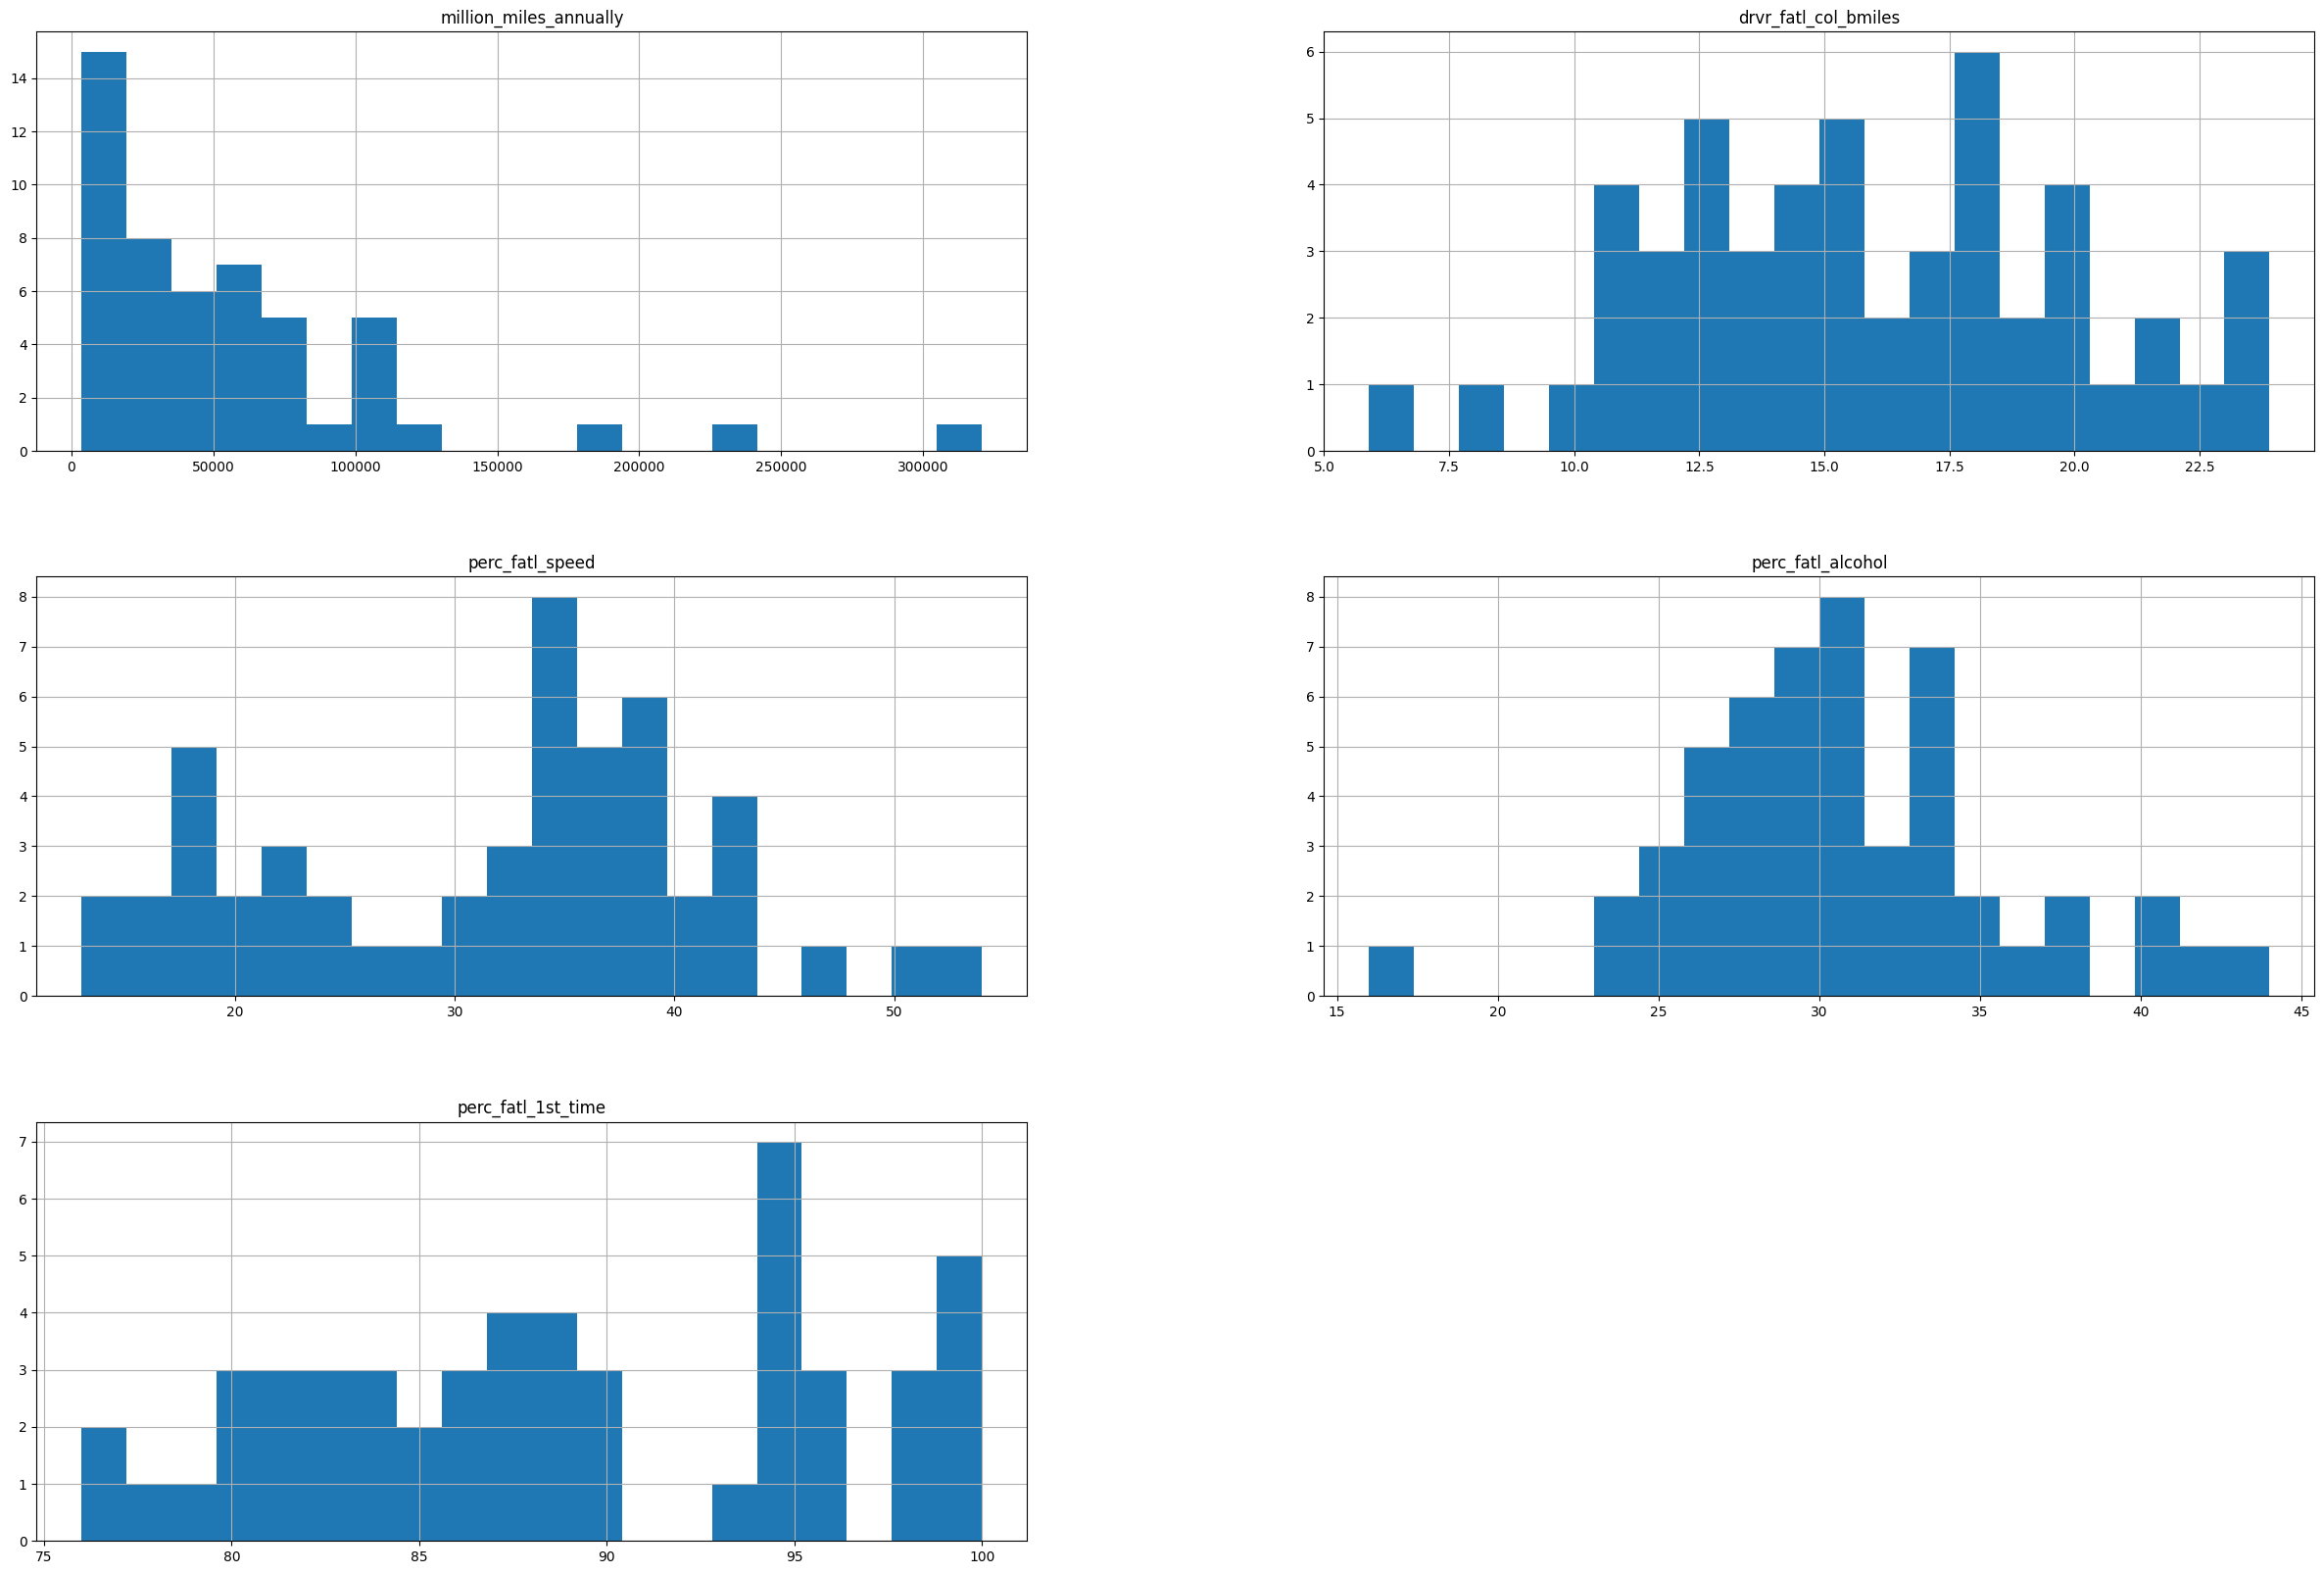

In [18]:
df.hist(figsize=(30,20),bins=20)

# 3.Quantify the association of features and accidents.

- To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:
   - **0.2 = weak**
   - **0.5 = medium**
   - **0.8 = strong**
   - **0.9 = very strong**

In [19]:
correlation = df.corr()
correlation

,million_miles_annually,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
million_miles_annually,1.000000,-0.077133,-0.043199,-0.034561,-0.128928
drvr_fatl_col_bmiles,-0.077133,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.043199,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,-0.034561,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.128928,-0.017942,0.014066,-0.245455,1.000000


## we will change the millions of miles to billions of miles

In [20]:
df['billion_miles_annually'] = df['million_miles_annually']/1000
df['billion_miles_annually'].head()

0     64.914
1      4.593
2     59.575
3     32.953
4    320.784
Name: billion_miles_annually, dtype: float64

## Then now drop the 'million_miles_annually' column

In [21]:
df.drop(['million_miles_annually'],axis=1,inplace=True)
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,billion_miles_annually
0,Alabama,18.8,39,30,80,64.914
1,Alaska,18.1,41,25,94,4.593
2,Arizona,18.6,35,28,96,59.575
3,Arkansas,22.4,18,26,95,32.953
4,California,12.0,35,28,89,320.784


Text(0.5, 1.0, 'drvr_fatl_col_bmiles VS million_miles_annually')

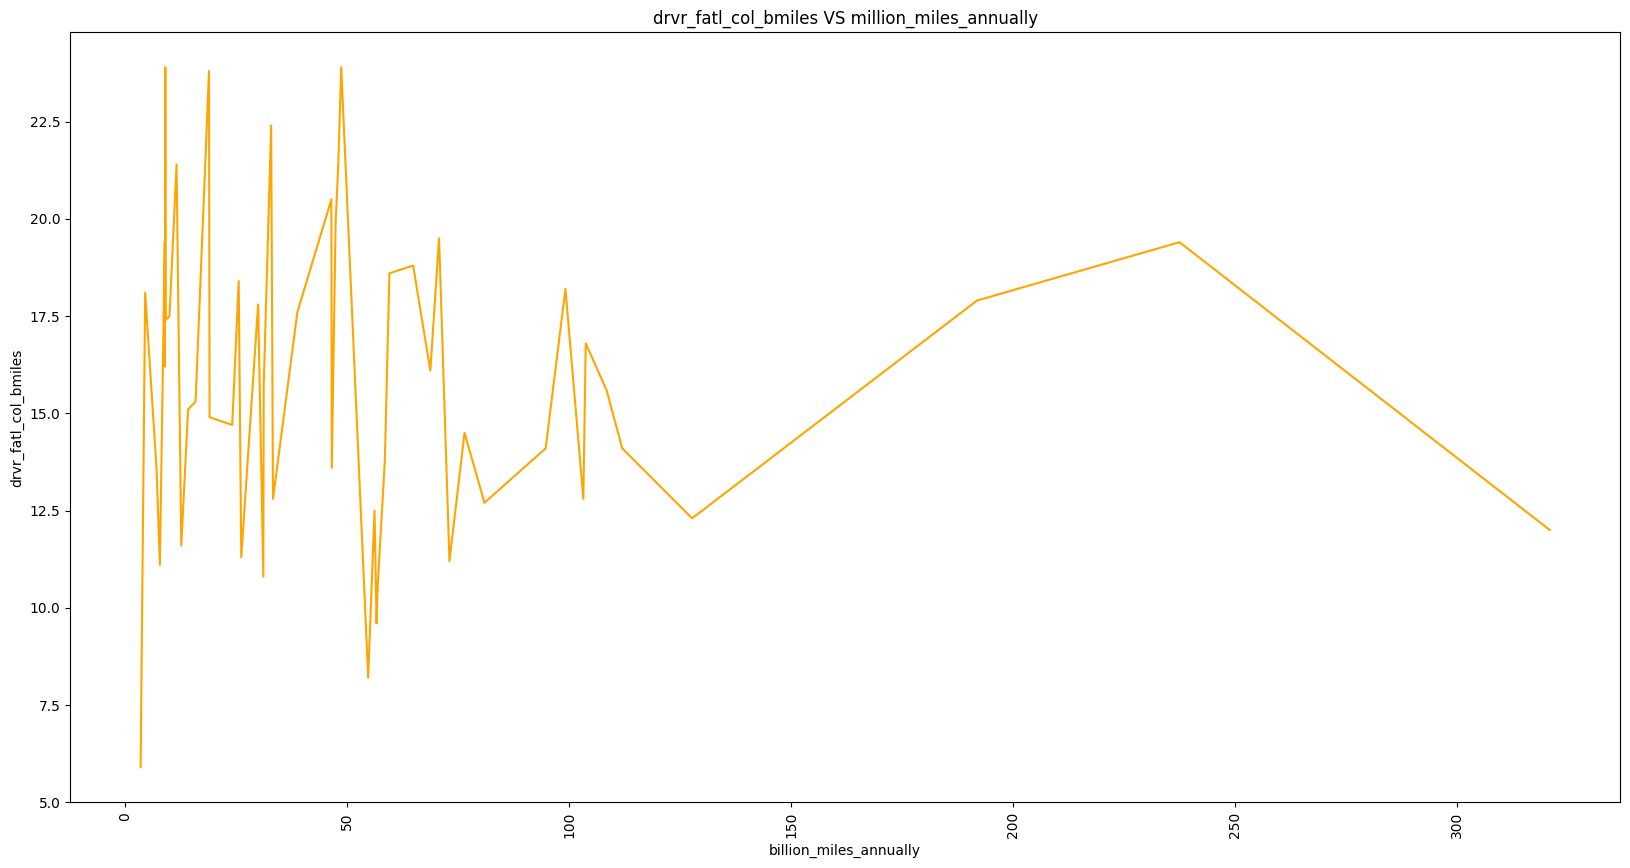

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(x='billion_miles_annually',y='drvr_fatl_col_bmiles',data=df,color='orange')
plt.xticks(rotation=90)
plt.title('drvr_fatl_col_bmiles VS million_miles_annually')

<AxesSubplot: xlabel='billion_miles_annually', ylabel='perc_fatl_speed'>

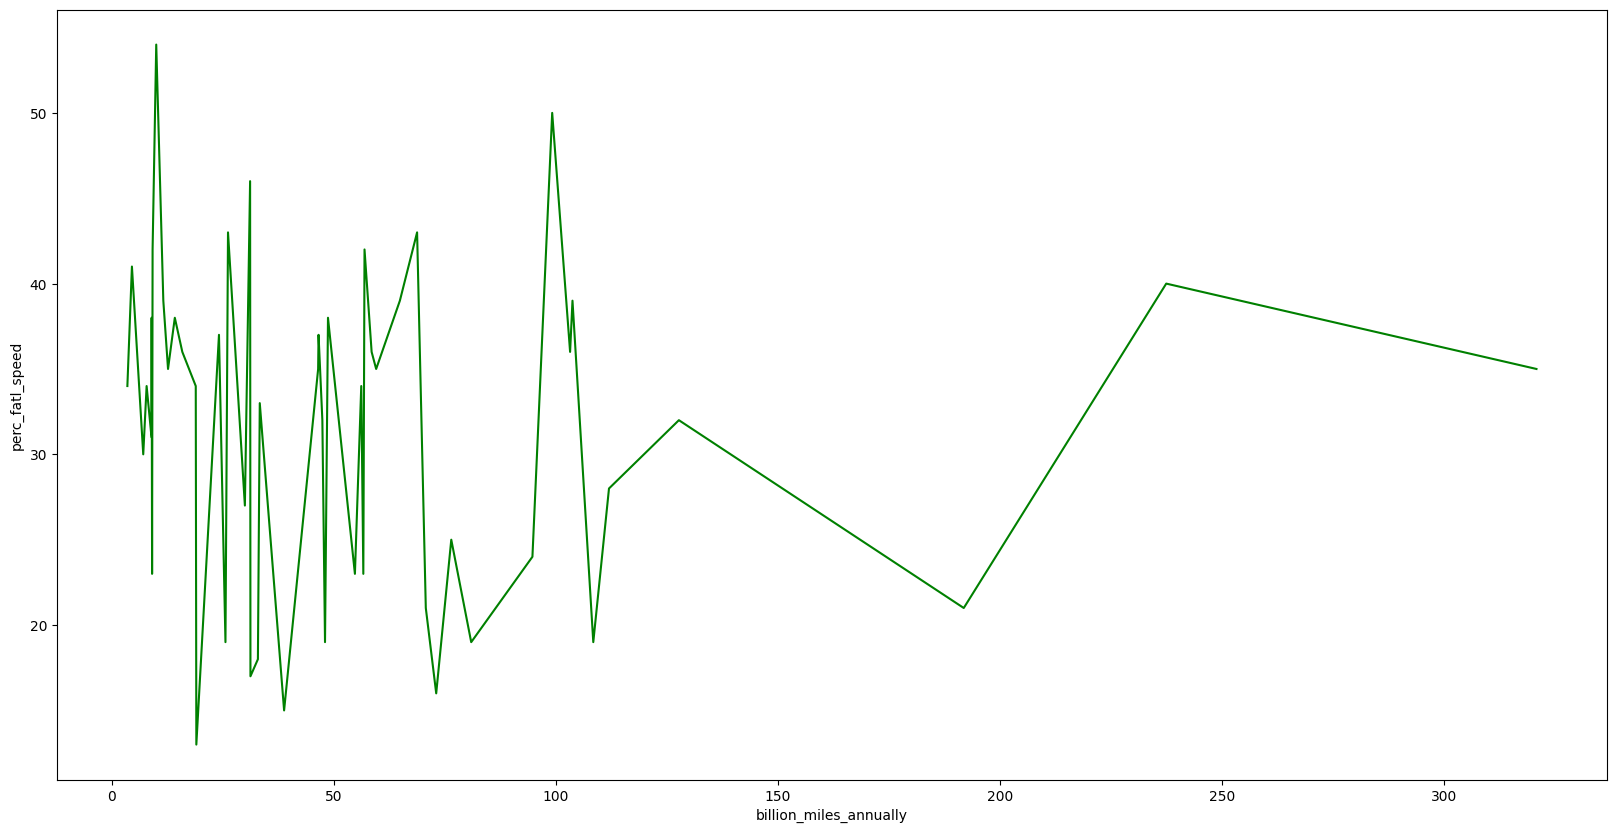

In [23]:
plt.figure(figsize=(20,10))
sns.lineplot(x='billion_miles_annually',y='perc_fatl_speed',data=df,color='green')

<AxesSubplot: xlabel='billion_miles_annually', ylabel='perc_fatl_alcohol'>

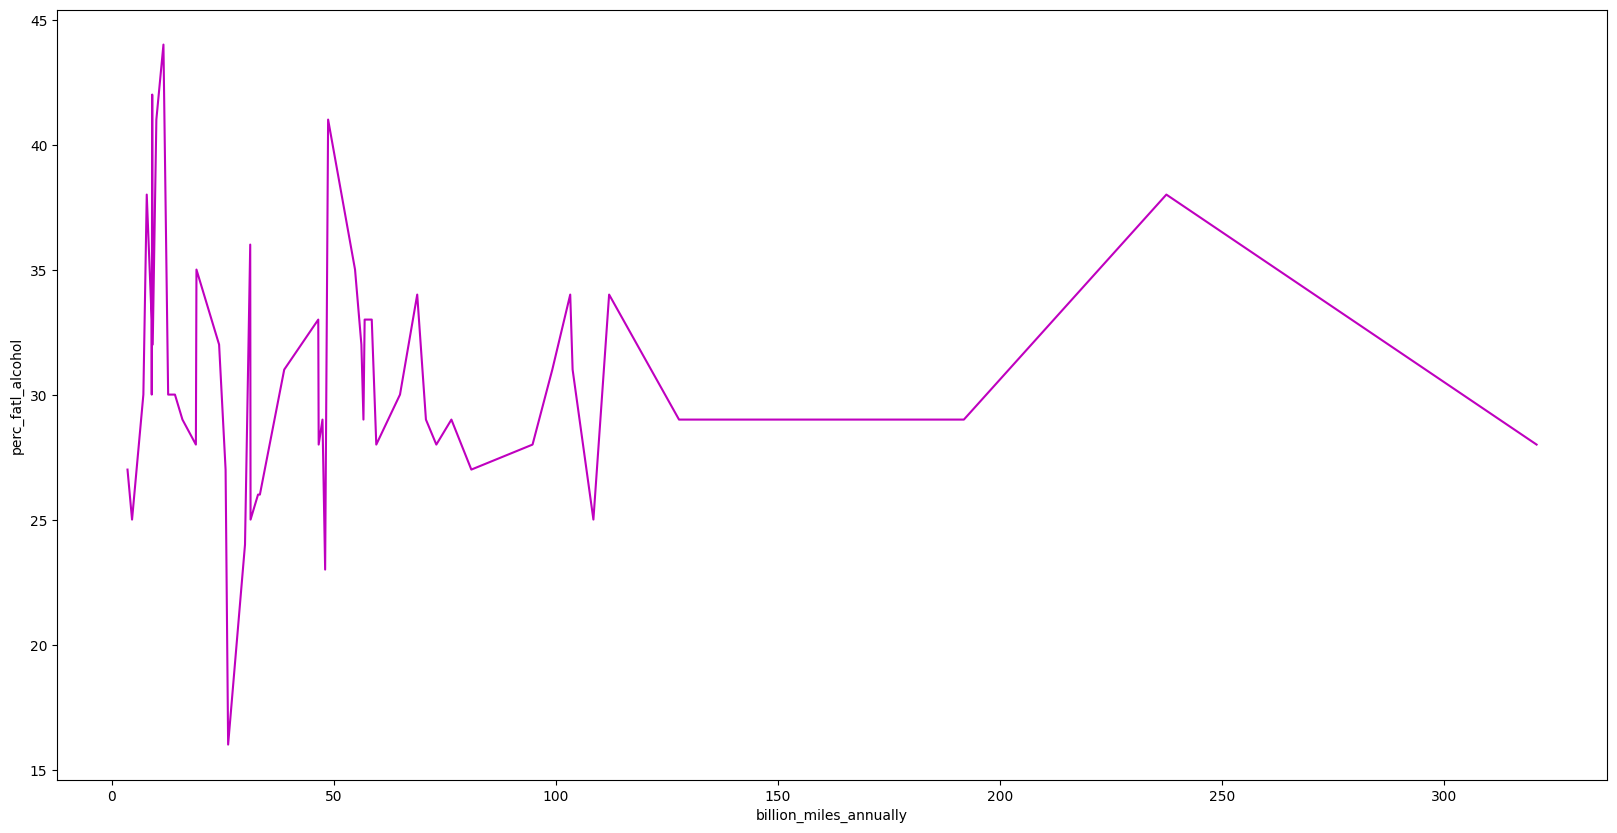

In [24]:
plt.figure(figsize=(20,10))
sns.lineplot(x='billion_miles_annually',y='perc_fatl_alcohol',data=df,color='m')

<AxesSubplot: xlabel='billion_miles_annually', ylabel='perc_fatl_1st_time'>

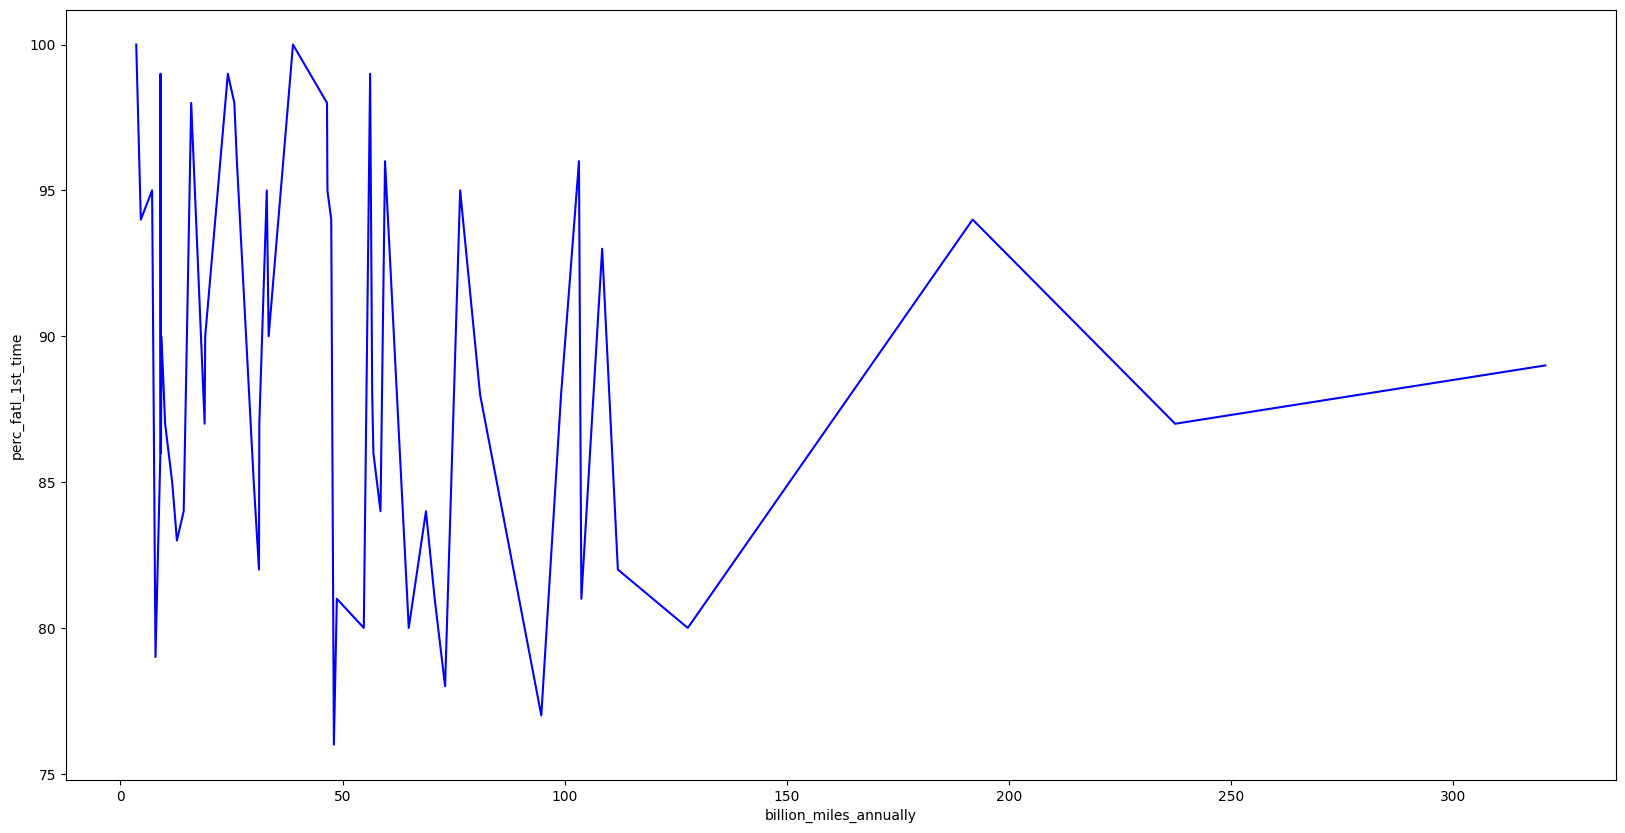

In [25]:
plt.figure(figsize=(20,10))
sns.lineplot(x='billion_miles_annually',y='perc_fatl_1st_time',data=df, color='blue')

<AxesSubplot: >

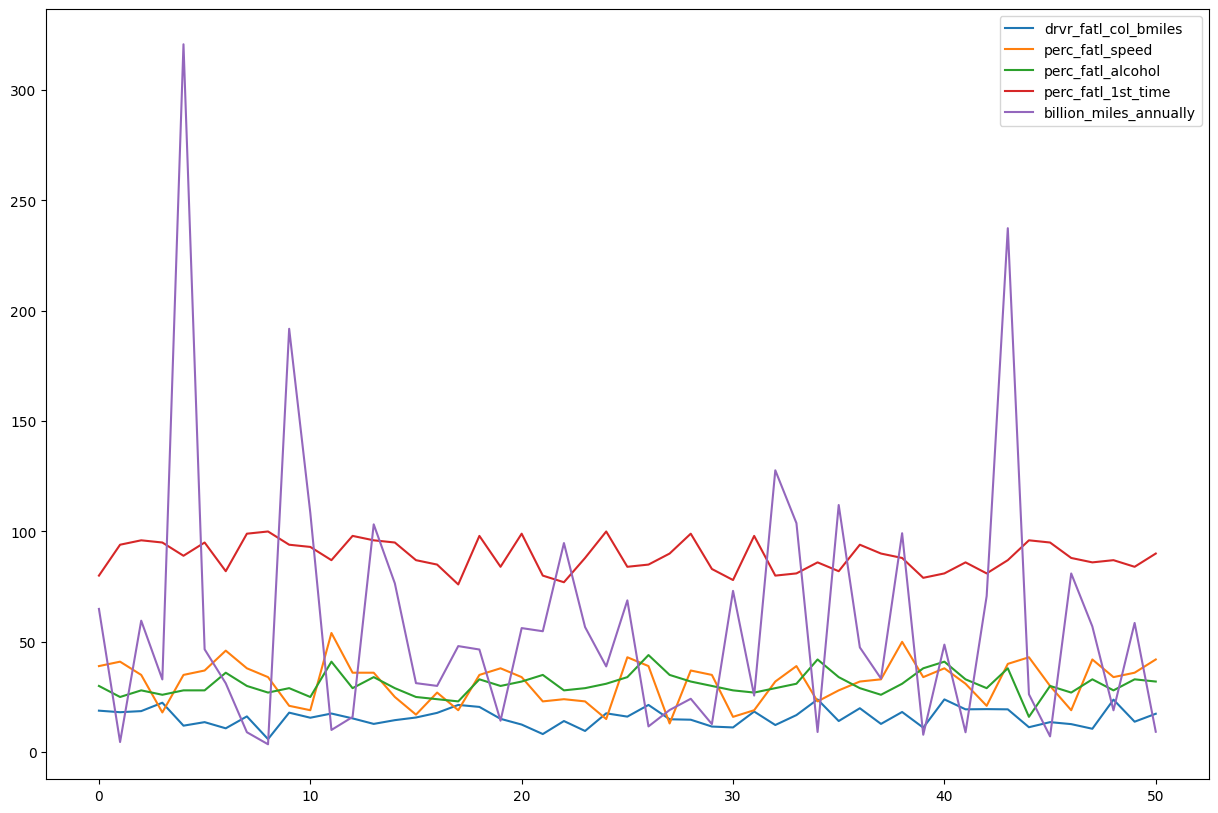

In [26]:
df.plot(figsize=(15,10),legend=True)

# 4.Fit a multivariate linear regression

From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression

**First of all we will train the accident data.**
   - import the sklearn **train_test_split**.

In [27]:
from sklearn.model_selection import train_test_split

- create a **x** and **y** variable.

In [28]:
x = df.iloc[:,2:5]
y = df.iloc[:,1:2]

**Trainig the model**

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print(x_test.head())
print(y_test.head())

    perc_fatl_speed  perc_fatl_alcohol  perc_fatl_1st_time
27               13                 35                  90
6                46                 36                  82
25               43                 34                  84
7                38                 30                  99
49               36                 33                  84
    drvr_fatl_col_bmiles
27                  14.9
6                   10.8
25                  16.1
7                   16.2
49                  13.8


**We need to import sklearn LinearRegression.**

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
y_predict = regressor.predict(x_test)
y_predict

array([[17.31768543],
       [16.67409569],
       [16.34851855],
       [15.46804017],
       [16.36686774],
       [16.14234948],
       [16.32054126],
       [15.36030736],
       [17.29168486],
       [15.73680493],
       [15.35637572]])

# 5.Perform PCA on standardized data.

We have learned that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.
One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).
We'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.

**We will import the sklearn preprocessing **Standardscaler**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [35]:
x_std = sc.fit_transform(x)

**Print the standardized data.**

In [36]:
print(f'Standardized Data:{x_std}')


Standardized Data:[[ 0.76264511 -0.1350496  -1.26611685]
 [ 0.97232113 -1.1189824   0.76536053]
 [ 0.34329308 -0.52862272  1.05557158]
 [-1.43895304 -0.92219584  0.91046605]
 [ 0.34329308 -0.52862272  0.03983289]
 [ 0.5529691  -0.52862272  0.91046605]
 [ 1.49651116  1.04566976 -0.9759058 ]
 [ 0.6578071  -0.1350496   1.49088816]
 [ 0.23845508 -0.72540928  1.63599369]
 [-1.12443902 -0.33183616  0.76536053]
 [-1.33411503 -1.1189824   0.620255  ]
 [ 2.33521522  2.02960256 -0.25037816]
 [ 0.44813109 -0.33183616  1.34578263]
 [ 0.44813109  0.65209664  1.05557158]
 [-0.70508699 -0.33183616  0.91046605]
 [-1.54379105 -1.1189824  -0.25037816]
 [-0.49541097 -1.31576896 -0.54058922]
 [-1.33411503 -1.51255552 -1.84653896]
 [ 0.34329308  0.45531008  1.34578263]
 [ 0.6578071  -0.1350496  -0.68569475]
 [ 0.23845508  0.25852352  1.49088816]
 [-0.914763    0.8488832  -1.26611685]
 [-0.809925   -0.52862272 -1.70143344]
 [-0.914763   -0.33183616 -0.10527264]
 [-1.75346706  0.06173696  1.63599369]
 [ 1.18

- **Now we need to import the PCA class function from sklearn.**

In [37]:
from sklearn.decomposition import PCA

In [38]:
pri_Componants = PCA()
pri_Componants.fit(x_std)

PCA()

**Plot the principle of components on the bar plot**

([<matplotlib.axis.XTick at 0x2440b5c9540>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

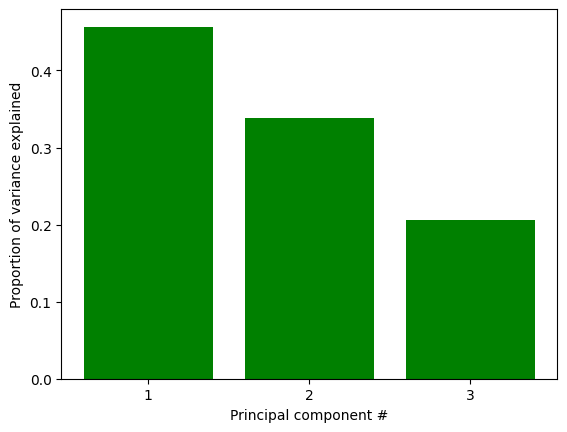

In [39]:
plt.bar(range(1, pri_Componants.n_components_ + 1),  pri_Componants.explained_variance_ratio_, color='green')
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# 6.Visualize the first two principal components.

The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states. Although clustering algorithms are becoming increasingly efficient, human pattern recognition is an easily accessible and very efficient method of assessing patterns in data.
We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

In [40]:
pri_Componants = PCA(n_components = 2)
pri_comps = pri_Componants.fit_transform(x_std)

pri_comps1 = pri_comps[:,0]
pri_comps2 = pri_comps[:,1]

**Show the first two principle componants in a scatter graph.**

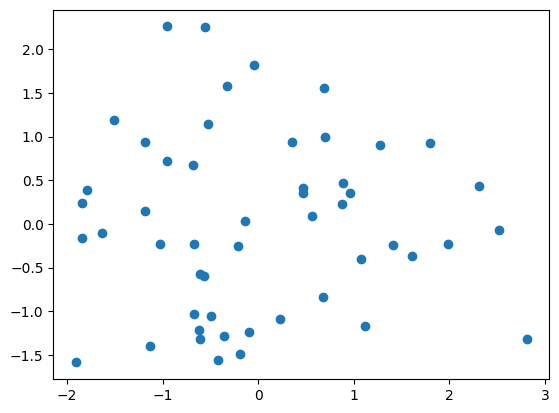

In [41]:
plt.scatter(pri_comps1,pri_comps2)

# 7.Find clusters of similar states in the data.

It was not entirely clear from the PCA scatter plot how many groups in which the states cluster. To assist with identifying a reasonable number of clusters, we can use KMeans clustering by creating a scree plot and finding the "elbow", which is an indication of when the addition of more clusters does not add much explanatory power.

**We will import the sklearn model KMeans.**

In [42]:
from sklearn.cluster import KMeans

**We need to use loop for finding clusters and creat a empty list.**

C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of 

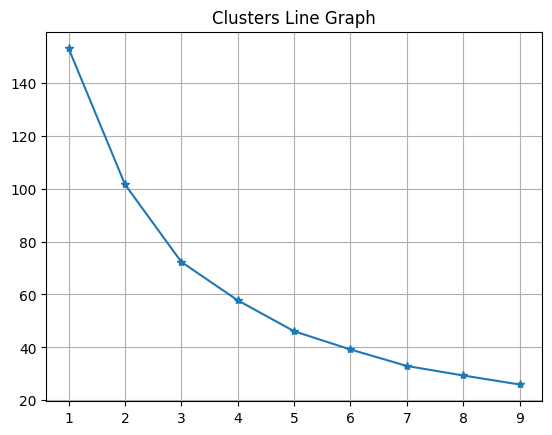

In [43]:
num = range(1,10)
cl = []
for n in num:
    cluster = KMeans(n_clusters=n , random_state=8)
    cluster.fit(x_std)
    cl.append(cluster.inertia_)
plt.plot(num, cl , marker='*')
plt.title('Clusters Line Graph')
plt.grid()

# 8.KMeans to visualize clusters in the PCA scatter plot.

Since there wasn't a clear elbow in the scree plot, assigning the states to either two or three clusters is a reasonable choice, and we will resume our analysis using three clusters. Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.

In [44]:
clusters = KMeans(n_clusters=3 , random_state=8)
clusters.fit(x_std)

C:\python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=8)

**Show the scatter plot on behalf of clusters.**

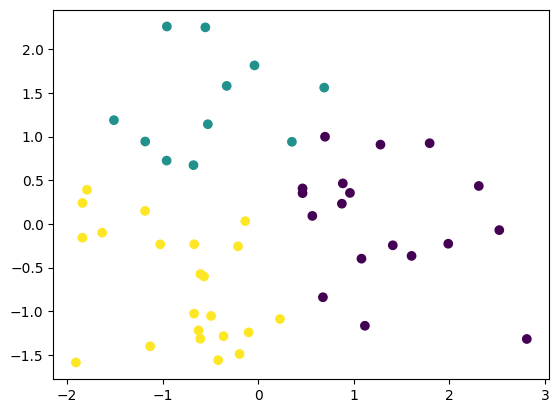

In [45]:
plt.scatter(pri_comps[:,0], pri_comps[:,1], c=clusters.labels_)

# 9.Visualize the feature differences between the clusters.

Thus far, we have used both our visual interpretation of the data and the KMeans clustering algorithm to reveal patterns in the data, but what do these patterns mean?
Remember that the information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. We used these clusters to visualize how the states group together when considering the first two principal components. This is good for us to understand structure in the data, but not always easy to understand, especially not if the findings are to be communicated to a non-specialist audience.
A reasonable next step in our analysis is to explore how the three clusters are different in terms of the three features that we used for clustering. Instead of using the scaled features, we return to using the unscaled features to help us interpret the differences.

**We eill create a new column for clusters**

In [46]:
df['clusters'] = clusters.labels_
df.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,billion_miles_annually,clusters
0,Alabama,18.8,39,30,80,64.914,0
1,Alaska,18.1,41,25,94,4.593,2
2,Arizona,18.6,35,28,96,59.575,2
3,Arkansas,22.4,18,26,95,32.953,2
4,California,12.0,35,28,89,320.784,2


**Reshape the new DataSet.**

In [47]:
accidental_cars = pd.melt(df , id_vars=['clusters'], var_name= 'size', value_name='percentage', value_vars=['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'] )
accidental_cars.head()

,clusters,size,percentage
0,0,perc_fatl_speed,39
1,2,perc_fatl_speed,41
2,2,perc_fatl_speed,35
3,2,perc_fatl_speed,18
4,2,perc_fatl_speed,35


- **Now Show the Clusters size in BoxPlot.**

<AxesSubplot: xlabel='percentage', ylabel='size'>

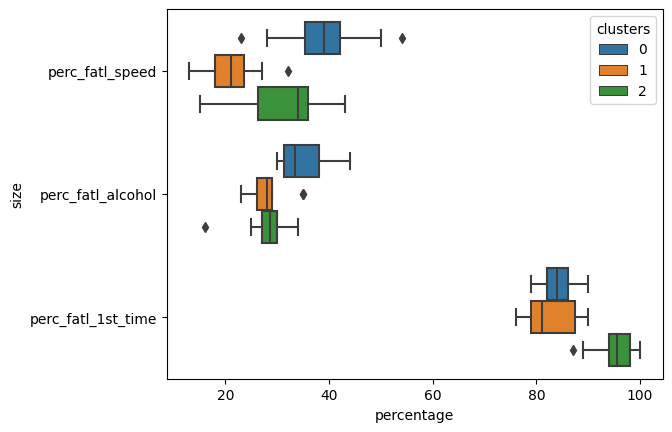

In [48]:
sns.boxplot(x='percentage', y='size', hue = 'clusters', data=accidental_cars)

# 10.Compute the number of accidents within each cluster.

Now it is clear that different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Which group would this be? To determine this, we will include data on how many miles are driven in each state, because this will help us to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file. We will assign this new information to a column in the DataFrame and create a violin plot for how many total fatal traffic accidents there are within each state cluster.

**First of all we will create a new column.** 

In [49]:
df['Number_driv_invol_fatl_collis_per_bill_miles'] = df['drvr_fatl_col_bmiles']*df['billion_miles_annually']

**Shoe the graph**

<AxesSubplot: xlabel='clusters', ylabel='Number_driv_invol_fatl_collis_per_bill_miles'>

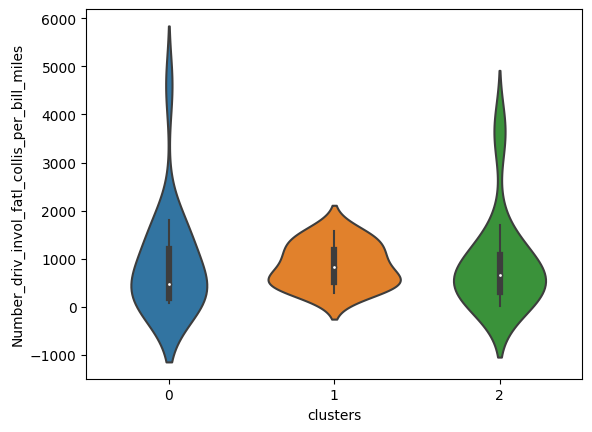

In [50]:
sns.violinplot(x='clusters', y='Number_driv_invol_fatl_collis_per_bill_miles', data=df, estimator=sum, ci=None)

**Summarry of accidental data**

In [51]:
summary = df.groupby('clusters')['Number_driv_invol_fatl_collis_per_bill_miles'].agg(['count','mean','sum'])
summary

,count,mean,sum
clusters,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


# 11.Make a decision when there is no clear right choice.

As we can see, there is no obvious correct choice regarding which cluster is the most important to focus on. Yet, we can still argue for a certain cluster and motivate this using our findings above. Which cluster do you think should be a focus for policy intervention and further investigation?

- **The Right choice is cluster 1 there is clear and safe way and cluster 0 and 2 is not clear and safe way.**